In [1]:
%run ../scripts/analyze_field_of_work.py
# preview

         qid  transgender male  female  male           field of work  \
0   Q4175034                 0       0     1              legislator   
1    Q210189                 0       0     1            Anti-fascism   
2    Q182603                 0       0     1          Church Fathers   
3    Q815297                 0       0     1         Systems biology   
4  Q16875712                 0       0     1              animal art   
5    Q184296                 0       3     2                tapestry   
6   Q1138951                 0       0     1  cognitive neuroscience   
7    Q170978                 0       1     2                robotics   
8      Q2053                 0       0     1                   HTML5   
9    Q194294                 0      17    79               bioethics   

                 category  
0              legislator  
1            Anti-fascism  
2           belief system  
3           life sciences  
4              animal art  
5                  matter  
6  cognitiv

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
# Make the graphs a bit prettier, and bigger
pd.set_option('display.mpl_style', 'default')
plt.rcParams['figure.figsize'] = (15, 5)

In [3]:
fow['total'] = fow[fow.columns[2:]].sum(axis=1)
fow.head()

,qid,transgender male,female,male,field of work,category,total
0,Q4175034,0,0,1,legislator,legislator,1
1,Q210189,0,0,1,Anti-fascism,Anti-fascism,1
2,Q182603,0,0,1,Church Fathers,belief system,1
3,Q815297,0,0,1,Systems biology,life sciences,1
4,Q16875712,0,0,1,animal art,animal art,1


In [4]:
category_wise_data = fow.groupby('category').aggregate(sum)
category_wise_data.loc[:, 'female/male ratio'] = category_wise_data.female/category_wise_data.male
category_wise_data.loc[:, 'male/female ratio'] = category_wise_data.male/category_wise_data.female
category_wise_data.describe()

,transgender male,female,male,total,female/male ratio,male/female ratio
count,983.000000,983.000000,983.000000,983.000000,978.000000,978.000000
mean,0.001017,0.952187,7.832146,8.784334,inf,inf
std,0.031895,5.751007,74.793043,79.904145,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,0.000000,4.000000
50%,0.000000,0.000000,1.000000,1.000000,0.000000,inf
75%,0.000000,1.000000,2.000000,2.000000,0.250000,inf
max,1.000000,124.000000,2028.000000,2152.000000,inf,inf


In [5]:
category_wise_data.sum()

transgender male        1.000000
female                936.000000
male                 7699.000000
total                8635.000000
female/male ratio            inf
male/female ratio            inf
dtype: float64

In [6]:
category_wise_data.sort('total', ascending=False).head(10)

,transgender male,female,male,total,female/male ratio,male/female ratio
category,,,,,,
science,0,124,2028,2152,0.061144,16.354839
figurative art,0,37,618,655,0.059871,16.702703
author,0,50,519,569,0.096339,10.380000
politician,0,21,510,531,0.041176,24.285714
topic–comment,0,85,368,453,0.230978,4.329412
health care provider,0,19,400,419,0.047500,21.052632
action,0,46,367,413,0.125341,7.978261
relation,0,10,109,119,0.091743,10.900000
information,0,16,95,111,0.168421,5.937500


In [7]:
category_wise_data.sort('male', ascending=False).head(10)

,transgender male,female,male,total,female/male ratio,male/female ratio
category,,,,,,
science,0,124,2028,2152,0.061144,16.354839
figurative art,0,37,618,655,0.059871,16.702703
author,0,50,519,569,0.096339,10.380000
politician,0,21,510,531,0.041176,24.285714
health care provider,0,19,400,419,0.047500,21.052632
topic–comment,0,85,368,453,0.230978,4.329412
action,0,46,367,413,0.125341,7.978261
relation,0,10,109,119,0.091743,10.900000
theory,0,7,101,108,0.069307,14.428571


In [8]:
category_wise_data.sort('female', ascending=False).head(10)

,transgender male,female,male,total,female/male ratio,male/female ratio
category,,,,,,
science,0,124,2028,2152,0.061144,16.354839
topic–comment,0,85,368,453,0.230978,4.329412
author,0,50,519,569,0.096339,10.380000
action,0,46,367,413,0.125341,7.978261
figurative art,0,37,618,655,0.059871,16.702703
art,0,31,59,90,0.525424,1.903226
artist,0,24,32,56,0.750000,1.333333
politician,0,21,510,531,0.041176,24.285714
sport,0,20,65,85,0.307692,3.250000


In [9]:
mf = category_wise_data[category_wise_data['male/female ratio'] < np.inf]
#fm.head()
mf = mf[mf['total'] > 87] # total greater than 1% of total population
mf.sort('male/female ratio', ascending=False).head(15)

,transgender male,female,male,total,female/male ratio,male/female ratio
category,,,,,,
politician,0,21,510,531,0.041176,24.285714
health care provider,0,19,400,419,0.047500,21.052632
figurative art,0,37,618,655,0.059871,16.702703
science,0,124,2028,2152,0.061144,16.354839
theory,0,7,101,108,0.069307,14.428571
relation,0,10,109,119,0.091743,10.900000
author,0,50,519,569,0.096339,10.380000
action,0,46,367,413,0.125341,7.978261
information,0,16,95,111,0.168421,5.937500


In [10]:
fm = category_wise_data[category_wise_data['female/male ratio'] < np.inf]
#fm.head()
fm = fm[fm['total'] > 87] # total greater than 1% of total population
fm.sort('female/male ratio', ascending=False).head(15)

,transgender male,female,male,total,female/male ratio,male/female ratio
category,,,,,,
art,0,31,59,90,0.525424,1.903226
topic–comment,0,85,368,453,0.230978,4.329412
late modern period,0,14,75,89,0.186667,5.357143
information,0,16,95,111,0.168421,5.937500
action,0,46,367,413,0.125341,7.978261
author,0,50,519,569,0.096339,10.380000
relation,0,10,109,119,0.091743,10.900000
theory,0,7,101,108,0.069307,14.428571
science,0,124,2028,2152,0.061144,16.354839


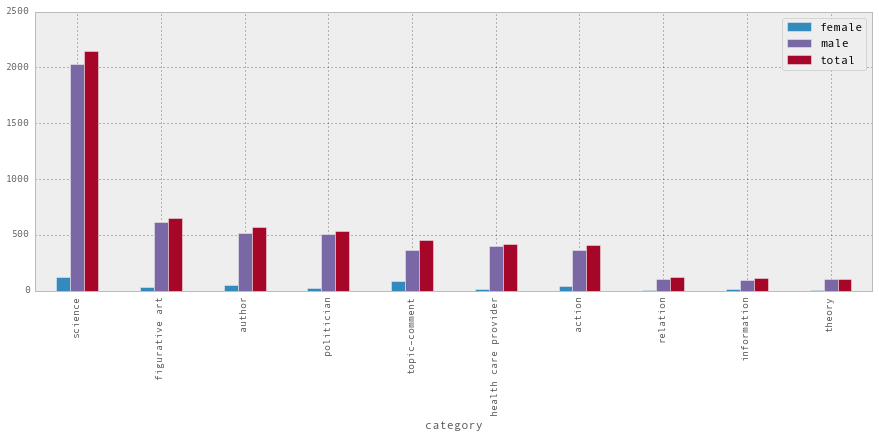

In [11]:
category_wise_data.sort('total', ascending=False).iloc[:10, [1, 2, 3]].plot(kind='bar')

/home/vivekrai/.miniconda/lib/python2.7/site-packages/numpy/lib/function_base.py:1890: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


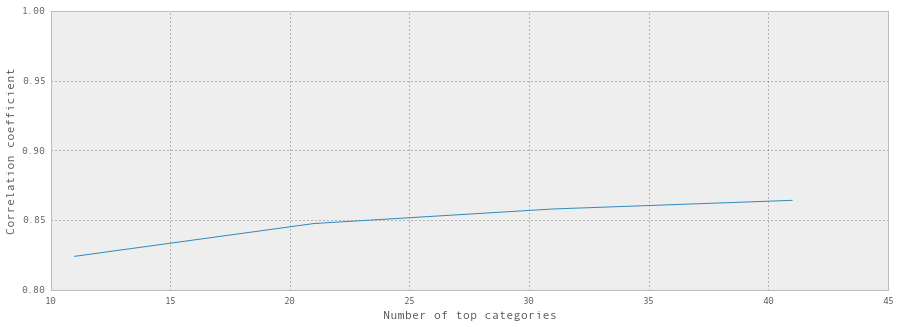

In [12]:
# Pearsons' correlation coefficient between number of male and female people
# working in top occupations.
cat_sorted = category_wise_data.sort('total', ascending=False)

x, y = list(range(1, 50, 10)), [np.corrcoef(cat_sorted['male'][:x], cat_sorted['female'][:x])[0,1] for x in range(1, 50, 10)]
plt.xlabel('Number of top categories')
plt.ylabel('Correlation coefficient')
plt.ylim([.8, 1])
plt.plot(x, y)

## A very high degree of correlation in occupation numbers of male and 
## female across varying number of top categories (by number).


##
## One can say that top categories have equal opportunity chances for
## males and females. However, there are certain areas which are *niche*
## for respective genders. For example, theory and politician
## males against art, artistic theme for females.
## It can be interesting, however, to see that if females are more likely
## to be present in *soft* fields as compared to males.
##

## Ancestors of node
In case you have a node from the graph and wish to find out its ancestor nodes, that is, all the nodes starting from which you can reach current node, you can use the do `nx.ancestors(DG, node)`.

For example,

```
>>> nx.ancestors(DG, (u'Q629206', u'computer language'))
{(u'Q2115', u'XML'),
 (u'Q37045', u'markup language'),
 (u'Q9143', u'programming language')}
```

This means that you can reach node `computer language` through the three nodes (it's a directed graph) in the output.

Another example,
```
>>> nx.ancestors(DG, (u'Q30185', u'mayor'))
set()
```

In this case, we do not get any ancestors, implying that `mayor` node is the beginning node or lowest level node in heirarchy of articles within our graph.

## Nodes/QIDs in a category
The nodes or Wikidata QIDs which have been classified into a particular category can be found out using `categories` dictionary.

* Querying `categories` dictionary

`categories` dictionary contains a set of all nodes which have been classified under a particular label. So, if you are looking for nodes which belong to `politician` label, you can simply examine the output of `categories['politician']`.

```
>>> categories['politician']
{(u'Q2285706', u'head of government'),
 (u'Q30185', u'mayor'),
 (u'Q82955', u'politician')}
```

In [29]:
obs = category_wise_data.iloc[:200, [1,2]]

In [19]:
import scipy.stats

In [30]:
scipy.stats.chi2_contingency(obs)

(252.51424611973391,
 0.006095550178801255,
 199,
 array([[  0.17204301,   0.82795699],
        [  0.34408602,   1.65591398],
        [  0.17204301,   0.82795699],
        [  0.17204301,   0.82795699],
        [  0.17204301,   0.82795699],
        [  0.17204301,   0.82795699],
        [  0.17204301,   0.82795699],
        [  0.17204301,   0.82795699],
        [  0.17204301,   0.82795699],
        [  0.51612903,   2.48387097],
        [  0.34408602,   1.65591398],
        [  0.17204301,   0.82795699],
        [  0.34408602,   1.65591398],
        [  0.17204301,   0.82795699],
        [  0.51612903,   2.48387097],
        [  0.17204301,   0.82795699],
        [  0.17204301,   0.82795699],
        [  0.17204301,   0.82795699],
        [  0.17204301,   0.82795699],
        [  0.17204301,   0.82795699],
        [  0.17204301,   0.82795699],
        [  0.17204301,   0.82795699],
        [  0.17204301,   0.82795699],
        [  0.17204301,   0.82795699],
        [  0.17204301,   0.82795699],
